In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percentage: float
    summary: str

In [3]:
def calculate_sr(state: BatsmanState):
    sr = (state['runs'] / state['balls']) * 100
    return {'sr': sr}

def calculate_bpb(state: BatsmanState):
    bpb = state['balls'] / (state['fours'] + state['sixes'])
    return {'bpb': round(bpb, 2)}

def calculate_boundary_percentage(state: BatsmanState):
    boundary_percentage = ((state['fours'] * 4 + state['sixes'] * 6) / state['runs']) * 100
    return {'boundary_percentage': round(boundary_percentage, 2)}

def summary(state: BatsmanState):
    summary = f"""
    Strike Rate: {state['sr']:.2f} \n
    Balls Per Boundary: {state['bpb']:.2f} \n
    Boundary Percentage: {state['boundary_percentage']:.2f}%
    """
    return {'summary': summary}

In [4]:
graph = StateGraph(BatsmanState)

# add nodes
graph.add_node("calculate_sr", calculate_sr)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("summary", summary)

In [5]:
graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_boundary_percentage")
graph.add_edge("calculate_sr", "summary")
graph.add_edge("calculate_bpb", "summary")
graph.add_edge("calculate_boundary_percentage", "summary")
graph.add_edge("summary", END)

workflow = graph.compile()

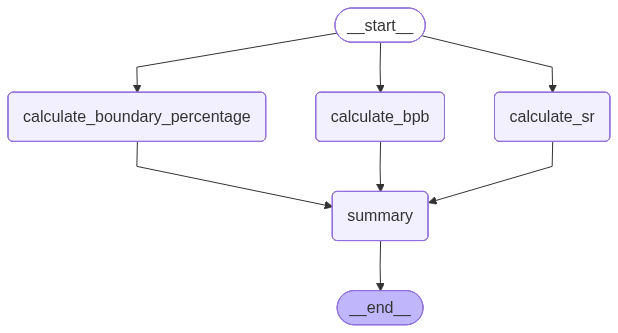

In [6]:
workflow

In [7]:
initial_state = {
    "runs": 85,
    "balls": 100,
    "fours": 10,
    "sixes": 5,
}

final_state = workflow.invoke(initial_state)

In [8]:
final_state

{'runs': 85,
 'balls': 100,
 'fours': 10,
 'sixes': 5,
 'sr': 85.0,
 'bpb': 6.67,
 'boundary_percentage': 82.35,
 'summary': '\n    Strike Rate: 85.00 \n\n    Balls Per Boundary: 6.67 \n\n    Boundary Percentage: 82.35%\n    '}